In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
from scipy.linalg import eigh

In [2]:
%matplotlib inline
# produce vector inline graphics
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

In [3]:
def generate_syn_data_two_class(n: int):
    cov = [[5,2],[2,1]]
    class_1 = np.random.multivariate_normal(mean=(0,0), cov=cov, size=n)
    class_2 = np.random.multivariate_normal(mean=(0,5), cov=cov, size=n)
    y_1 = np.ones(shape=n)
    y_2 = np.ones(shape=n) * -1
    return np.concatenate([class_1, class_2]), np.concatenate([y_1, y_2])
    

In [4]:
def plot_classes(X, y):
    fig, ax = plt.subplots(figsize=(4,4))

    class_indices = np.unique(y)
    for i in class_indices:
        X_i = X[y==i, :]
        ax.plot(X_i[:,0], X_i[:,1], 'o', label=f"class ${i}$")
        ax.legend()
        
    ax.grid(True, which='both')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    return fig, ax

In [5]:
def generate_class_matrices(X: np.ndarray, y: np.ndarray) -> List[np.ndarray]:
    class_indices = np.unique(y)
    X_partition = []
    for i in class_indices:
        X_partition.append(X[y==i, :])
    return X_partition

def compute_partition_center(X_partition: List[np.ndarray]) -> List[np.ndarray]:
    c = []
    for X_i in X_partition:
        c.append(np.mean(X_i, axis=0))
    return c

def compute_within_class_spread(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    X_partition = generate_class_matrices(X, y)
    c_partition = compute_partition_center(X_partition)
    X_centered_partition = []
    
    for i, X_i in enumerate(X_partition):
        c_i = c_partition[i]
        X_centered_partition.append(X_i - c_i)
    X_w_T = np.concatenate(X_centered_partition)
    return X_w_T.T

def compute_inter_class_spread(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    X_partition = generate_class_matrices(X, y)
    c_partition = compute_partition_center(X_partition)
    c = X.mean(axis=0)
    centered_centroids = []
    for c_i in c_partition:
        centered_centroids.append((c_i - c).reshape(-1,2))
    X_b = np.concatenate(centered_centroids)
    return X_b

def compute_spread_matrices(X: np.ndarray, y: np.ndarray) -> Tuple[np.ndarray]:
    X_w = compute_within_class_spread(X, y)
    X_b = compute_inter_class_spread(X, y)
    
    return np.matmul(X_w, X_w.T), np.matmul(X_b, X_b.T)

(<Figure size 288x288 with 1 Axes>,
 <AxesSubplot:xlabel='$x_1$', ylabel='$x_2$'>)

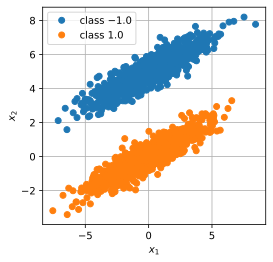

In [6]:
N = 1000
X, y = generate_syn_data_two_class(N)
plot_classes(X, y)

In [7]:
S_w, S_b = compute_spread_matrices(X, y)

In [8]:
S_w

array([[10423.58124339,  4106.63195743],
       [ 4106.63195743,  2034.47633124]])

In [9]:
S_b

array([[ 6.2010964, -6.2010964],
       [-6.2010964,  6.2010964]])

In [10]:
l, v = eigh(a=S_b, b=S_w)

In [16]:
X_projected = np.matmul(v[:,1], X.T)

In [37]:
def plot_projected(X_projected, y):
    fig, ax = plt.subplots(figsize=(4,4))
    class_indices = np.unique(y)
    for i in class_indices:
        ax.hist(X_projected[y==i], bins=20, label=f"class {i}")
    ax.set_xlabel("$q^T X$")
    ax.set_ylabel("freq.")
    ax.legend()
    return fig, ax

(<Figure size 288x288 with 1 Axes>,
 <AxesSubplot:xlabel='$q^T X$', ylabel='freq.'>)

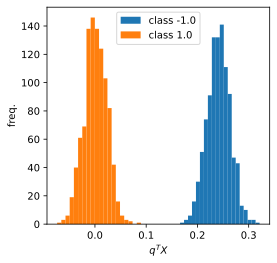

In [38]:
plot_projected(X_projected, y)